In [2]:
# Biblioteca Pandas - Manipulação de dados
import pandas as pd
# Biblioteca Seaborn - Criação de gráficos
import seaborn as sns
# Biblioteca Matplotlib - Criação de gráficos
import matplotlib.pyplot as plt

# OPCIONAL - Biblioteca para ignorar mensagens de warning (aviso) ao rodar uma célula de código
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Bibliotecas de machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

# Métricas de avaliação dos modelos
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
# Função read_csv para importar os dados da pasta do computador
initial_data = pd.read_csv('precos_carros_brasil.csv')
# Listando o nome das colunas
initial_data.columns

initial_data.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0


In [5]:
initial_data.isna().any()

year_of_reference     True
month_of_reference    True
fipe_code             True
authentication        True
brand                 True
model                 True
fuel                  True
gear                  True
engine_size           True
year_model            True
avg_price_brl         True
dtype: bool

In [6]:
# sumo la cantidad de valores fantaltes por columna 
initial_data.isna().sum()
# initial_data.isnull().sum()

year_of_reference     65245
month_of_reference    65245
fipe_code             65245
authentication        65245
brand                 65245
model                 65245
fuel                  65245
gear                  65245
engine_size           65245
year_model            65245
avg_price_brl         65245
dtype: int64

In [7]:
# Elimino valores faltantes en todas las columnas 
initial_data.dropna( axis=0, inplace=True)
# este elimina por columna especifica
# initial_data.dropna(subset=['columna1', 'columna2'], inplace=True)


In [8]:
# verifico valores nulos nuevamente
#initial_data.isna().any()
# listo valores
print(initial_data)

        year_of_reference month_of_reference fipe_code  authentication  \
0                  2021.0            January  004001-0    cfzlctzfwrcp   
1                  2021.0            January  004001-0    cdqwxwpw3y2p   
2                  2021.0            January  004001-0    cb1t3xwwj1xp   
3                  2021.0            January  004001-0    cb9gct6j65r0   
4                  2021.0            January  004003-7    g15wg0gbz1fx   
...                   ...                ...       ...             ...   
202292             2023.0            January  005538-7  ccv3mvxnsz0dqw   
202293             2023.0            January  005539-5    chmwfg3l5hbp   
202294             2023.0            January  005539-5  cdj27srtcvcdqw   
202295             2023.0            January  005540-9     9w64fg6dhqp   
202296             2023.0            January  005540-9   7hbnjmj9z5dqw   

                  brand                                   model      fuel  \
0        GM - Chevrolet           

In [9]:
# seleccionando en dos variabnbles columnas numeridas y categoricas

colums_numeric = [ col for col in initial_data.columns if initial_data[col].dtype !=  'object' ]

colums_categoricas  = [ col for col in initial_data.columns if initial_data[col].dtype ==  'object' ]



In [10]:
print(colums_numeric)
print(colums_categoricas)

['year_of_reference', 'year_model', 'avg_price_brl']
['month_of_reference', 'fipe_code', 'authentication', 'brand', 'model', 'fuel', 'gear', 'engine_size']


In [11]:
# listar valores de los dataFrames por separado
initial_data[colums_numeric].describe()
# print(initial_data[colums_categoricas])
# initial_data.dtypes

,year_of_reference,year_model,avg_price_brl
count,202297.000000,202297.000000,202297.000000
mean,2021.564694,2011.271527,52756.909153
std,0.571903,6.376234,51628.677716
min,2021.000000,2000.000000,6647.000000
25%,2021.000000,2006.000000,22855.000000
50%,2022.000000,2012.000000,38027.000000
75%,2022.000000,2016.000000,64064.000000
max,2023.000000,2023.000000,979358.000000


In [12]:
initial_data[['model', 'brand']].value_counts()

model                                   brand          
Palio Week. Adv/Adv TRYON 1.8 mpi Flex  Fiat               425
Focus 1.6 S/SE/SE Plus Flex 8V/16V 5p   Ford               425
Saveiro 1.6 Mi/ 1.6 Mi Total Flex 8V    VW - VolksWagen    400
Focus 2.0 16V/SE/SE Plus Flex 5p Aut.   Ford               400
Doblo Adv/Adv TRYON/LOCKER 1.8 Flex     Fiat               375
                                                          ... 
Saveiro Robust 1.6 Total Flex 16V CD    VW - VolksWagen      2
Polo Track 1.0 Flex 12V 5p              VW - VolksWagen      2
STEPWAY Zen Flex 1.0 12V Mec.           Renault              2
Gol Last Edition 1.0 Flex 12V 5p        VW - VolksWagen      2
KICKS Active 1.6 16V Flex Aut.          Nissan               2
Name: count, Length: 2112, dtype: int64

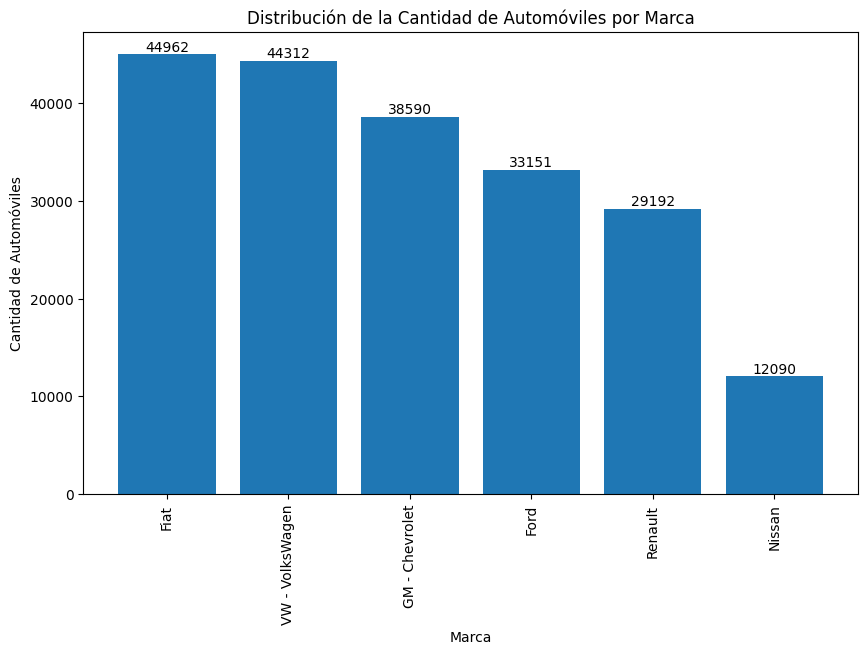

In [13]:


# Obtener el conteo de automóviles por marca
conteo_por_marca = initial_data['brand'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
grafico = plt.bar(conteo_por_marca.index, conteo_por_marca.values)

# Configurar las etiquetas y el título
plt.bar_label(grafico, labels=conteo_por_marca.values, label_type='edge')
plt.xlabel('Marca')
plt.ylabel('Cantidad de Automóviles')
plt.title('Distribución de la Cantidad de Automóviles por Marca')


# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

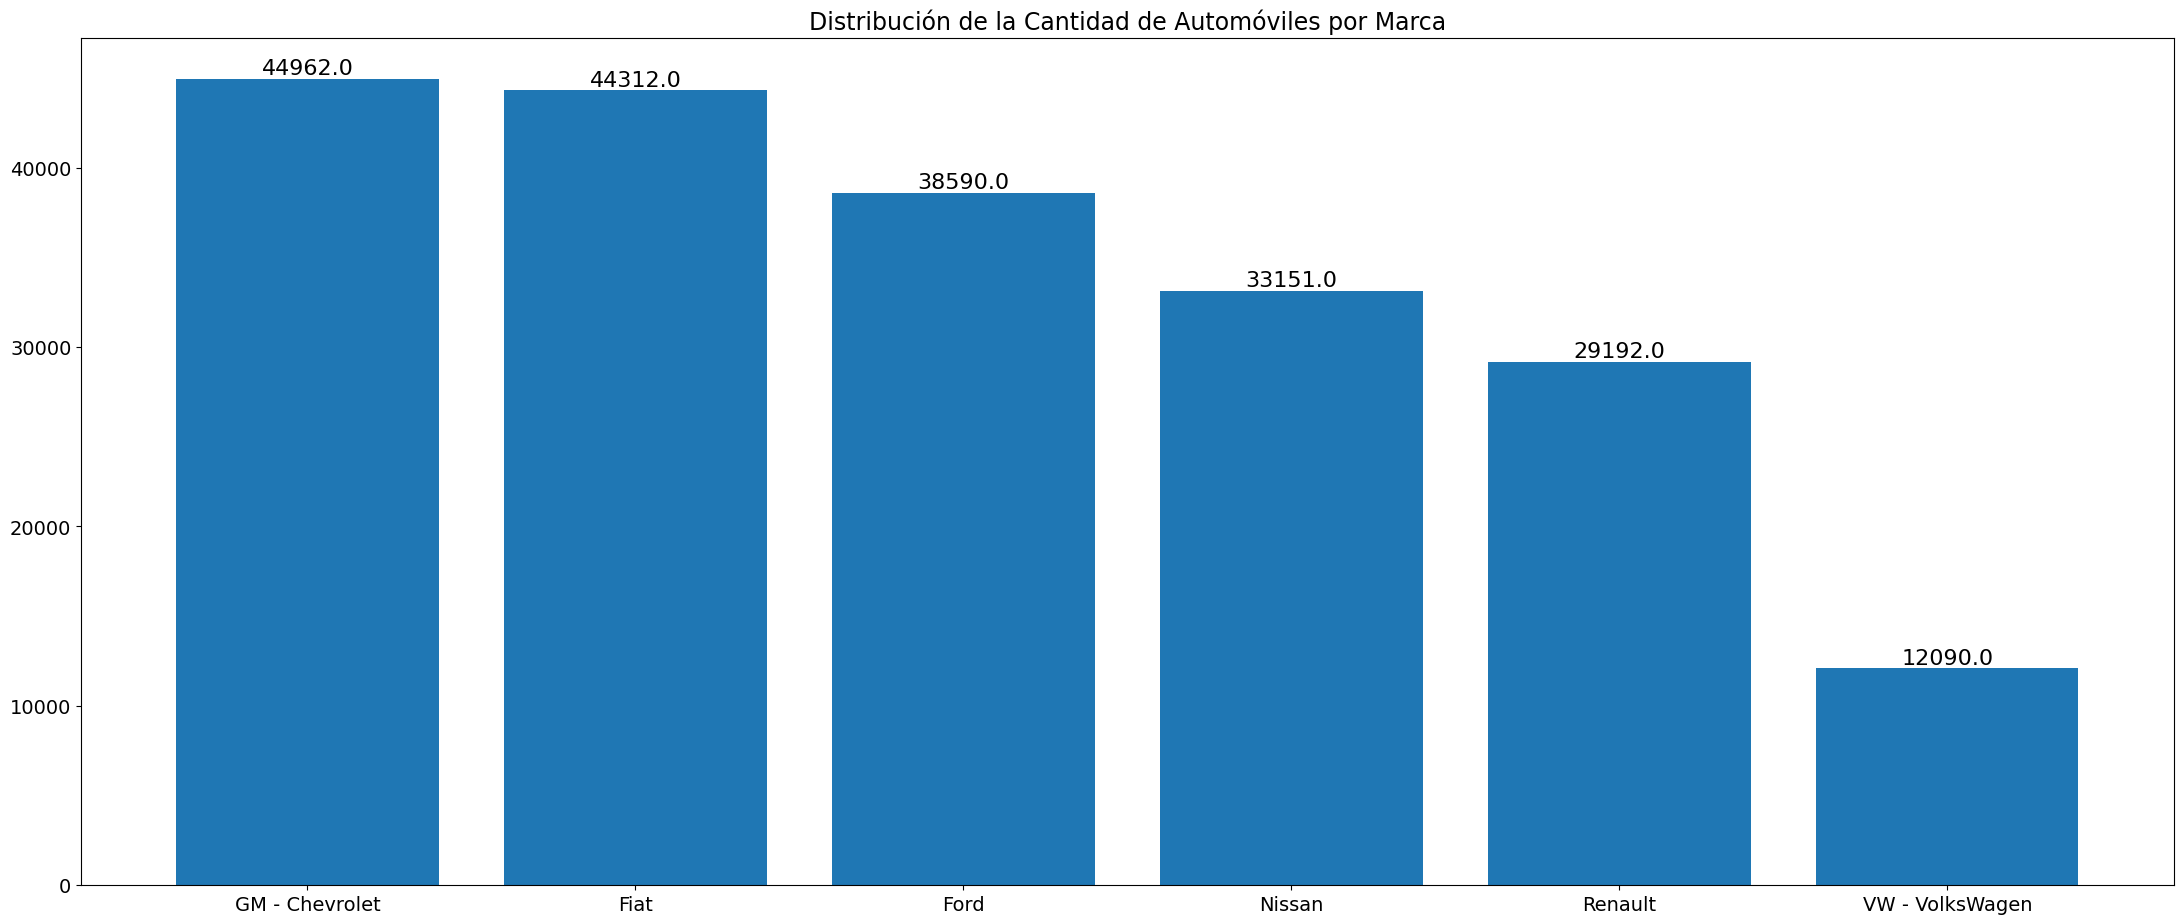

In [14]:

plt.figure(figsize=(27, 11))
grafico_2 = plt.bar(initial_data['brand'].unique(), initial_data['brand'].value_counts())
plt.title('Distribución de la Cantidad de Automóviles por Marca', fontsize=17)


# aumerta el tamanho do textos dos eixos (ejes)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# colocando o rotulos nas barras
plt.bar_label(grafico_2, fmt='%.01f',  size=16, label_type='edge'); 

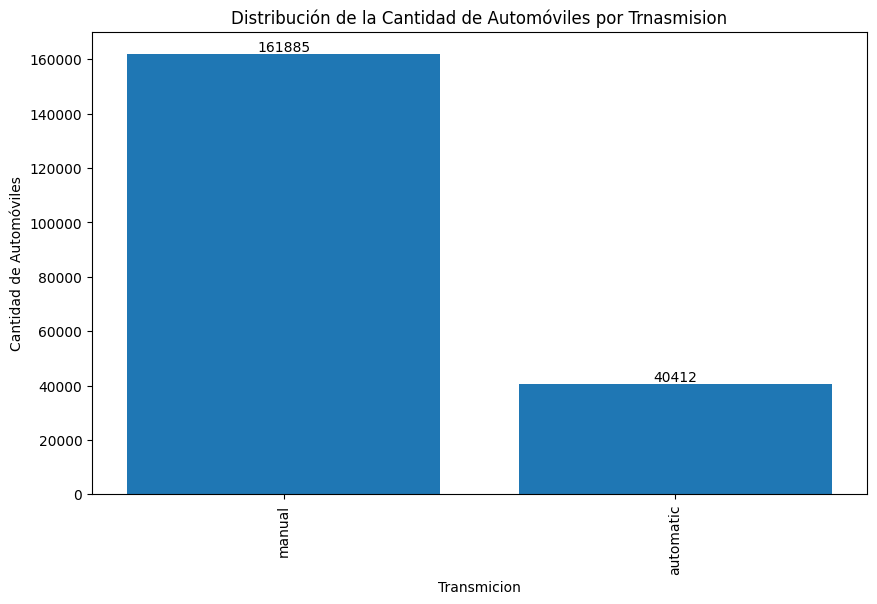

In [15]:
# Obtener el conteo de automóviles por tipo de transmicion
conteo_por_marca = initial_data['gear'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
grafico = plt.bar(conteo_por_marca.index, conteo_por_marca.values)

# Configurar las etiquetas y el título
plt.bar_label(grafico, labels=conteo_por_marca.values, label_type='edge')
plt.xlabel('Transmicion')
plt.ylabel('Cantidad de Automóviles')
plt.title('Distribución de la Cantidad de Automóviles por Trnasmision')


# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

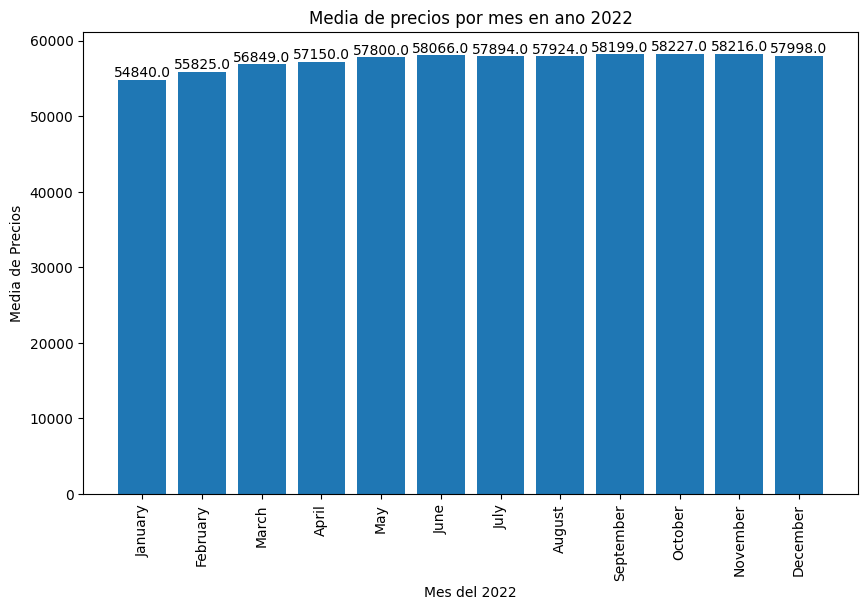

In [16]:

# Seleccionar los datos correspondientes al año 2022 y calcular la media de los precios por mes
media_autos_mes_2022 = initial_data.loc[initial_data['year_of_reference'] == 2022
                                        ].groupby(['month_of_reference'])['avg_price_brl'].mean().round(0)

# Crear una lista con los nombres de los meses en inglés en el orden deseado
orden_meses = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Reindexar la serie media_autos_mes_2022 según el orden de los meses
media_autos_mes_2022_ordenado = media_autos_mes_2022.reindex(orden_meses)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
grafico = plt.bar(media_autos_mes_2022_ordenado.index, media_autos_mes_2022_ordenado.values)

# Configurar las etiquetas y el título
plt.bar_label(grafico, labels=media_autos_mes_2022_ordenado.values, label_type='edge')
plt.xlabel('Mes del 2022')
plt.ylabel('Media de Precios')
plt.title('Media de precios por mes en ano 2022')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()


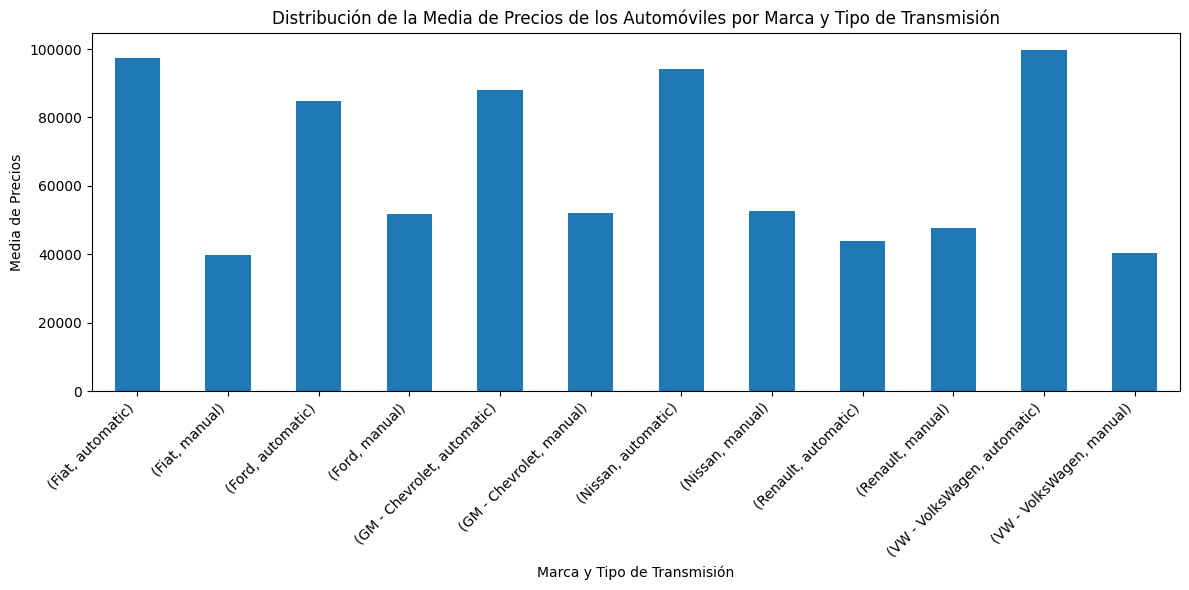

In [17]:
""" # Seleccionar los datos correspondientes al año 2022 y calcular la media de los precios por mes
media_autos_mes_2022 = initial_data.groupby(['gear', 'brand'])['avg_price_brl'].mean().round(0)



# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
media_autos_mes_2022.plot(kind='bar')

# Configurar las etiquetas y el título
plt.xlabel('Marca y Tipo de Transmisión')
plt.ylabel('Media de Precios')
plt.title('Distribución de la Media de Precios de los Automóviles por Marca y Tipo de Transmisión')

# Mostrar el gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show() """

# Calcular la media de los precios de los automóviles por marca y tipo de transmisión
media_precios_por_marca_y_transmision = initial_data.groupby(['brand', 'gear'])['avg_price_brl'].mean().round(0)

# Ordenar el índice por marca
media_precios_por_marca_y_transmision = media_precios_por_marca_y_transmision.reorder_levels(['brand', 'gear'])

# Ordenar los datos por marca
media_precios_por_marca_y_transmision = media_precios_por_marca_y_transmision.sort_index(level=0)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
media_precios_por_marca_y_transmision.plot(kind='bar')

# Configurar las etiquetas y el título
plt.xlabel('Marca y Tipo de Transmisión')
plt.ylabel('Media de Precios')
plt.title('Distribución de la Media de Precios de los Automóviles por Marca y Tipo de Transmisión')

# Mostrar el gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


brand            fuel    
Fiat             Alcohol      11510.0
                 Diesel       99814.0
                 Gasoline     37197.0
Ford             Alcohol      10149.0
                 Diesel       94522.0
                 Gasoline     45845.0
GM - Chevrolet   Alcohol      13698.0
                 Diesel       99817.0
                 Gasoline     56497.0
Nissan           Diesel       95534.0
                 Gasoline     59043.0
Renault          Diesel      104530.0
                 Gasoline     37059.0
VW - VolksWagen  Alcohol      13393.0
                 Diesel      139216.0
                 Gasoline     44654.0
Name: avg_price_brl, dtype: float64


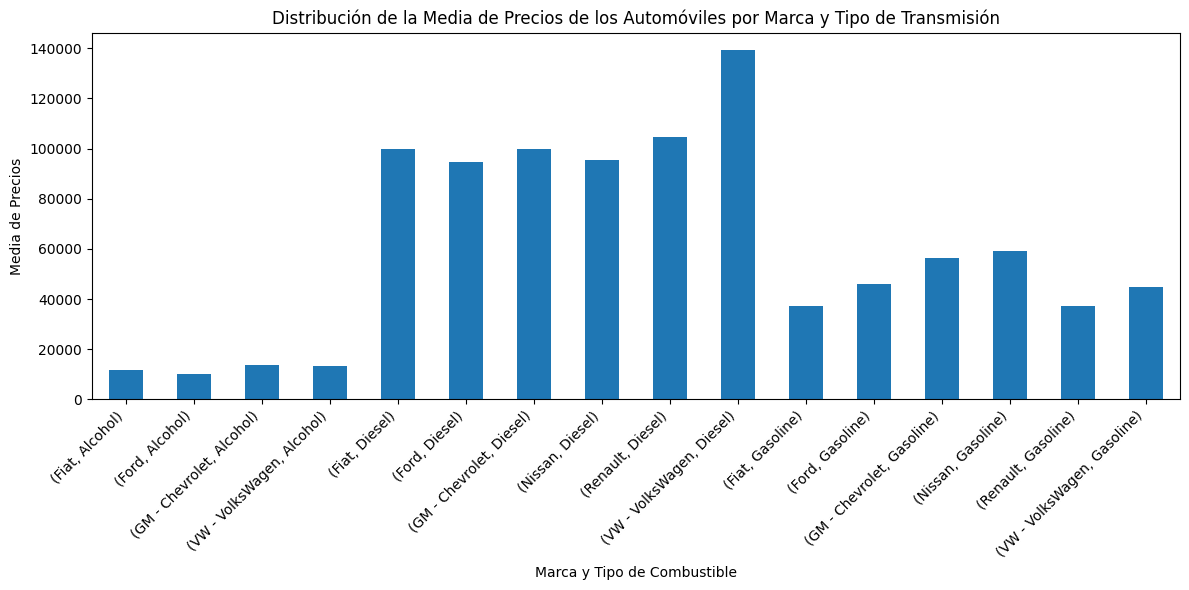

In [18]:
# f. Genere un gráfico de la distribución de la media de precios de los automóviles por marca y tipo de combustible.


# Calcular la media de los precios de los automóviles por marca y tipo de transmisión
media_precios_por_marca_tipoCombustible = initial_data.groupby(['brand', 'fuel'])['avg_price_brl'].mean().round(0)

print(media_precios_por_marca_tipoCombustible)

# Ordenar el índice por marca
media_precios_por_marca_tipoCombustible = media_precios_por_marca_tipoCombustible.reorder_levels(['brand', 'fuel'])

# Ordenar los datos por tipo conbustible 
media_precios_por_marca_tipoCombustible = media_precios_por_marca_tipoCombustible.sort_index(level=1)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
media_precios_por_marca_tipoCombustible.plot(kind='bar')

# Configurar las etiquetas y el título
plt.xlabel('Marca y Tipo de Combustible')
plt.ylabel('Media de Precios')
plt.title('Distribución de la Media de Precios de los Automóviles por Marca y Tipo de Transmisión')

# Mostrar el gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [19]:
#   transformacion de columnas a numero de combustible y tipo de transmicion 
# primer data manual  1 manual , 0 automatico
initial_data['gear'] = LabelEncoder().fit_transform(initial_data['gear'])
# gasolina, alcohol  2 gasolina , 0 alcohol, 1 disel 
initial_data['fuel'] = LabelEncoder().fit_transform(initial_data['fuel']) 
print(initial_data.head())

   year_of_reference month_of_reference fipe_code authentication  \
0             2021.0            January  004001-0   cfzlctzfwrcp   
1             2021.0            January  004001-0   cdqwxwpw3y2p   
2             2021.0            January  004001-0   cb1t3xwwj1xp   
3             2021.0            January  004001-0   cb9gct6j65r0   
4             2021.0            January  004003-7   g15wg0gbz1fx   

            brand                                   model  fuel  gear  \
0  GM - Chevrolet            Corsa Wind 1.0 MPFI / EFI 2p     2     1   
1  GM - Chevrolet            Corsa Wind 1.0 MPFI / EFI 2p     2     1   
2  GM - Chevrolet            Corsa Wind 1.0 MPFI / EFI 2p     2     1   
3  GM - Chevrolet            Corsa Wind 1.0 MPFI / EFI 2p     0     1   
4  GM - Chevrolet  Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI     2     1   

  engine_size  year_model  avg_price_brl  
0           1      2002.0         9162.0  
1           1      2001.0         8832.0  
2           1      2000

In [20]:
# Variável dados_num contém apenas variáveis numéricas de interesse (exclui o restante)
initial_data_numeric = initial_data.drop(['month_of_reference', 'authentication', 'brand', 'model',
       'authentication', 'fipe_code', 'engine_size'] , axis = 1)
initial_data_numeric.head()

,year_of_reference,fuel,gear,year_model,avg_price_brl
0,2021.0,2,1,2002.0,9162.0
1,2021.0,2,1,2001.0,8832.0
2,2021.0,2,1,2000.0,8388.0
3,2021.0,0,1,2000.0,8453.0
4,2021.0,2,1,2001.0,12525.0


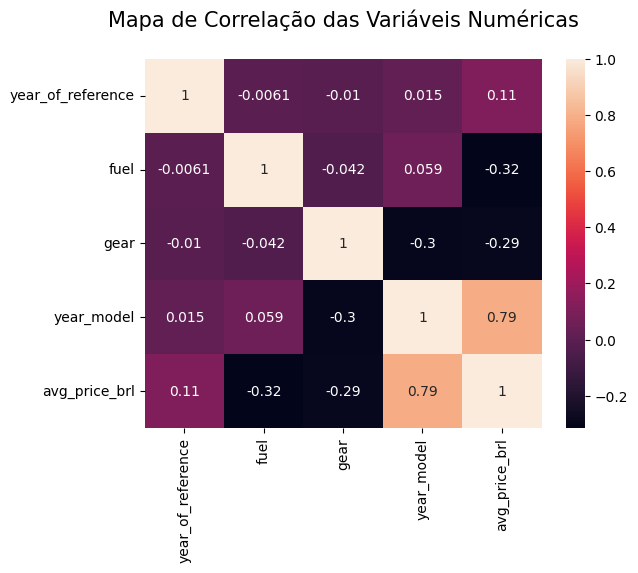

In [21]:
# Mapa de correlação das variáveis numéricas com variável Target
sns.heatmap(initial_data_numeric.corr("spearman"), annot = True)
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 15)
plt.show()

In [22]:
# Variável X contém apenas variáveis numéricas de interesse para a análise, excluindo a variável target 
X = initial_data_numeric.drop(['avg_price_brl'], axis = 1)
X.head()

,year_of_reference,fuel,gear,year_model
0,2021.0,2,1,2002.0
1,2021.0,2,1,2001.0
2,2021.0,2,1,2000.0
3,2021.0,0,1,2000.0
4,2021.0,2,1,2001.0


In [23]:
# Variável Y contém apenas a variável target - avg_price_brl
Y = initial_data_numeric['avg_price_brl']
Y.head()

0     9162.0
1     8832.0
2     8388.0
3     8453.0
4    12525.0
Name: avg_price_brl, dtype: float64

In [24]:
# Divisão: 30% dos dados são de teste e 70% de treinamento
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [25]:
print(X_test)

        year_of_reference  fuel  gear  year_model
180634             2022.0     2     1      2014.0
13130              2021.0     2     1      2005.0
163316             2022.0     2     1      2006.0
121463             2022.0     2     1      2009.0
14044              2021.0     2     0      2019.0
...                   ...   ...   ...         ...
53887              2021.0     2     1      2019.0
198721             2023.0     2     1      2017.0
150903             2022.0     2     1      2013.0
86334              2021.0     2     0      2022.0
100551             2022.0     1     0      2013.0

[60690 rows x 4 columns]


In [26]:
# Observando os dados de treinamento
print(X_train.shape)
X_train.head(1)

(141607, 4)


,year_of_reference,fuel,gear,year_model
200898,2023.0,2,1,2003.0


In [27]:
# Observando os dados de teste
print(X_test.shape)
X_test.head(1)

(60690, 4)


,year_of_reference,fuel,gear,year_model
180634,2022.0,2,1,2014.0


In [28]:
# Observando a variável target
Y_test.head()

180634    41426.0
13130     10989.0
163316    27673.0
121463    27854.0
14044     57102.0
Name: avg_price_brl, dtype: float64

Trenamiento del Modelo

In [29]:
# Algoritmo Random Forest, sem especificar nenhum parâmetro (número de árvores, número de ramificações, etc)
model_rf = RandomForestRegressor()

In [30]:
# Ajuste do modelo, de acordo com as variáveis de treinamento, entrenamiento del modelo
model_rf.fit(X_train, Y_train)

RandomForestRegressor()

In [31]:
# Predição dos valores de salário com base nos dados de teste
valores_preditos_rf = model_rf.predict(X_test)

In [32]:
# Valores preditos
valores_preditos_rf

array([ 50448.1533305 ,  19267.08593696,  23959.30781634, ...,
        43503.10938193, 110328.13139798, 118773.81609118])

In [33]:
feature_importances = pd.DataFrame(model_rf.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending = False)
feature_importances

,importance
year_model,0.624397
fuel,0.318850
gear,0.039059
year_of_reference,0.017694


In [34]:
mse = mean_squared_error(Y_test, valores_preditos_rf)
mse

1182608799.2829645

In [35]:
mae = mean_absolute_error(Y_test, valores_preditos_rf)
mae

13716.634159962847

In [36]:
r2_score(Y_test, valores_preditos_rf)

0.5590152728736253